## El Plan
1. Visualize data as-is
2. Run C-Means
3. Visualize data after C-Means
4. Define linguistic variables (length is short/long, etc.)
5. Define linguistic rules (if sepal length is short and sepal width is short ... then is ...)

## Links:
- https://archive.ics.uci.edu/ml/datasets/Iris
- https://www.kaggle.com/prateekk94/fuzzy-c-means-clustering-on-iris-dataset
- http://ce.sharif.edu/courses/92-93/1/ce957-1/resources/root/Lectures/Lecture4&5.pdf

In [2]:
import numpy
import skfuzzy
import skfuzzy as fuzz
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from time import time

In [3]:
# Hyper-parameters
randomness_precision = 10000
epsilon = 0.001
m = 2
exponent = (2 / (m - 1))

In [4]:
def parse_headers() -> List[str]:
    with open('data/iris.names') as fp:
        result = [line.split(':')[0] for line in fp.readlines() if "|" not in line and len(line) > 1]
        return result

In [5]:
headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('data/iris.data', names=headers)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
clean_data = data.iloc[:, :-1]
clean_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


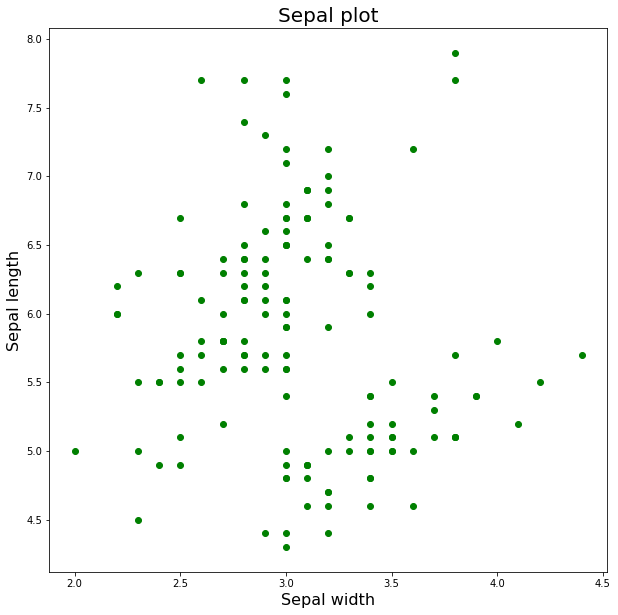

In [7]:
plt.figure(figsize=(10, 10))

plt.title('Sepal plot', fontsize=20)
plt.xlabel('Sepal width', fontsize=16)
plt.ylabel('Sepal length', fontsize=16)

plt.scatter(clean_data['sepal_width'], clean_data['sepal_length'], c='green')

plt.show()

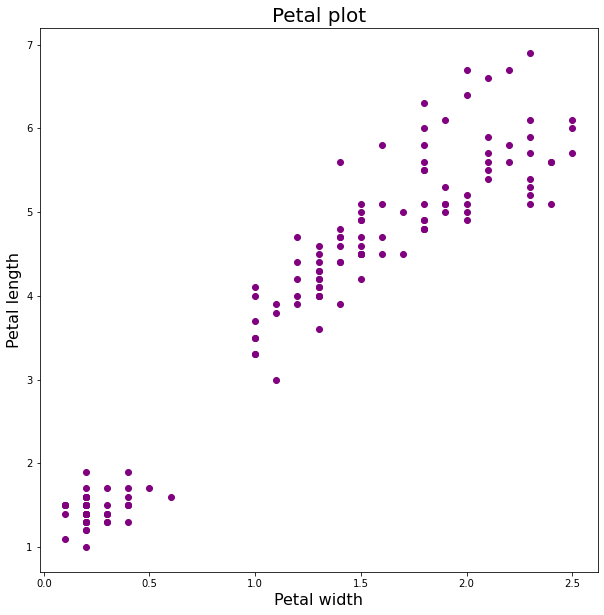

In [8]:
plt.figure(figsize=(10, 10))

plt.title('Petal plot', fontsize=20)
plt.xlabel('Petal width', fontsize=16)
plt.ylabel('Petal length', fontsize=16)

plt.scatter(clean_data['petal_width'], clean_data['petal_length'], c='purple')

plt.show()

In [9]:
centers, matrix, _, _, _, _, _ = fuzz.cmeans(clean_data.T, c=3, m=2, error=0.0001, maxiter=1000)
matrix

array([[1.16344792e-03, 7.15573581e-03, 6.26062190e-03, 9.83262587e-03,
        1.94172687e-03, 2.10701044e-02, 6.50567599e-03, 1.21408374e-04,
        2.15316962e-02, 5.04227785e-03, 1.04649234e-02, 2.38662599e-03,
        8.83091628e-03, 2.49972336e-02, 3.80953658e-02, 5.50130848e-02,
        1.79593674e-02, 1.16808720e-03, 3.06457581e-02, 7.01189087e-03,
        9.49402762e-03, 5.08823220e-03, 1.40096781e-02, 6.00647835e-03,
        9.73386815e-03, 7.56991595e-03, 1.56837090e-03, 2.16696069e-03,
        2.00100348e-03, 6.06046033e-03, 6.16153917e-03, 7.96717315e-03,
        2.08609114e-02, 3.29501028e-02, 5.04227785e-03, 4.67309078e-03,
        1.16794512e-02, 5.04227785e-03, 1.89494894e-02, 5.16603979e-04,
        1.80589838e-03, 4.63665641e-02, 1.50614560e-02, 6.45648496e-03,
        1.69321628e-02, 8.30420067e-03, 7.69398859e-03, 7.95314218e-03,
        7.52206585e-03, 8.28729755e-04, 5.00973615e-01, 2.06611998e-01,
        5.99759984e-01, 8.04981005e-02, 2.16926304e-01, 2.046838

In [10]:
centers_pd = pd.DataFrame(centers, columns=headers[:-1])
centers_pd

,sepal_length,sepal_width,petal_length,petal_width
0,6.775102,3.052426,5.646894,2.053601
1,5.889186,2.761230,4.364235,1.397436
2,5.003561,3.403036,1.485000,0.251541


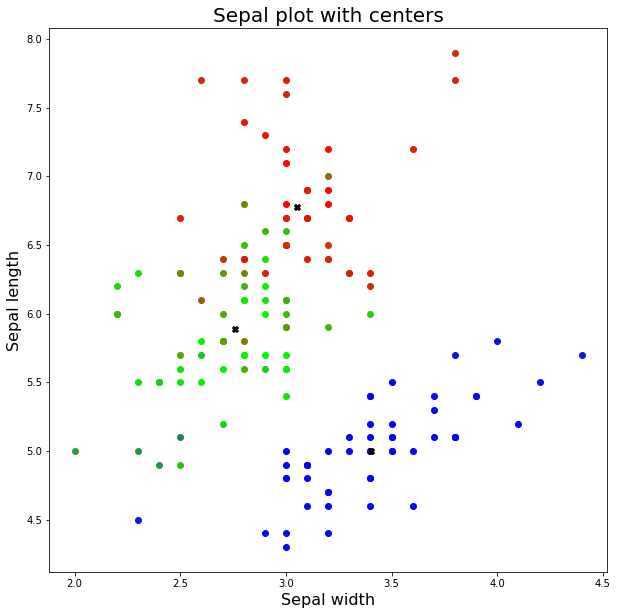

In [11]:
plt.figure(figsize=(10, 10))

plt.title('Sepal plot with centers', fontsize=20)
plt.xlabel('Sepal width', fontsize=16)
plt.ylabel('Sepal length', fontsize=16)


for i in range(len(clean_data['sepal_width'])):
    plt.scatter(clean_data['sepal_width'][i], clean_data['sepal_length'][i], color = matrix[:, i])

plt.scatter(centers_pd['sepal_width'], centers_pd['sepal_length'], marker='X', color='black')
plt.show()

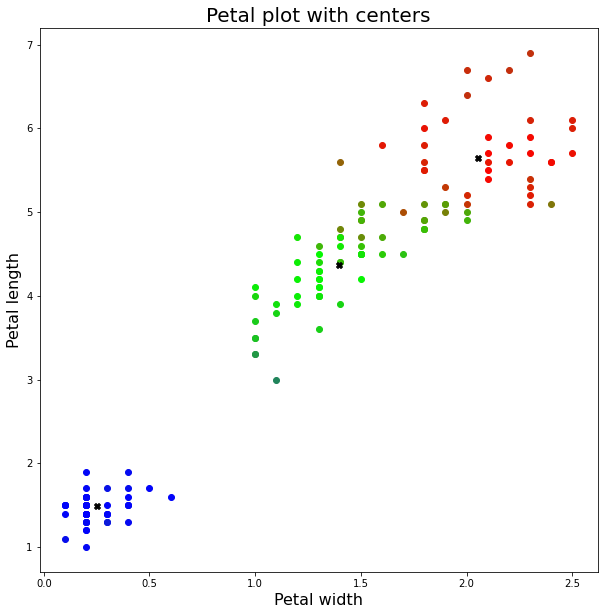

In [12]:
plt.figure(figsize=(10, 10))

plt.title('Petal plot with centers', fontsize=20)
plt.xlabel('Petal width', fontsize=16)
plt.ylabel('Petal length', fontsize=16)


for i in range(len(clean_data['petal_width'])):
    plt.scatter(clean_data['petal_width'][i], clean_data['petal_length'][i], color = matrix[:, i])

plt.scatter(centers_pd['petal_width'], centers_pd['petal_length'], marker='X', color='black')
plt.show()

In [13]:
slope = 1

sepal_width_short = fuzz.gbellmf(x=clean_data["sepal_width"],
                                  a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].min()),
                                  b=slope,
                                  c=centers_pd['sepal_width'].min())

sepal_width_normal = fuzz.gbellmf(x=clean_data["sepal_width"],
                                   a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].min()),
                                   b=slope,
                                   c=centers_pd['sepal_width'].median())
sepal_width_long = fuzz.gbellmf(x=clean_data["sepal_width"],
                                 a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].max()),
                                 b=slope,
                                 c=centers_pd['sepal_width'].max())

sepal_length_short = fuzz.gbellmf(x=clean_data["sepal_length"],
                                  a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].min()),
                                  b=slope,
                                  c=centers_pd['sepal_length'].min())

sepal_length_normal = fuzz.gbellmf(x=clean_data["sepal_length"],
                                   a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].min()),
                                   b=slope,
                                   c=centers_pd['sepal_length'].median())
sepal_length_long = fuzz.gbellmf(x=clean_data["sepal_length"],
                                 a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].max()),
                                 b=slope,
                                 c=centers_pd['sepal_length'].max())

petal_length_short = fuzz.gbellmf(x=clean_data["petal_length"],
                                  a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].min()),
                                  b=slope,
                                  c=centers_pd['petal_length'].min())

petal_length_normal = fuzz.gbellmf(x=clean_data["petal_length"],
                                   a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].min()),
                                   b=slope,
                                   c=centers_pd['petal_length'].median())
petal_length_long = fuzz.gbellmf(x=clean_data["petal_length"],
                                 a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].max()),
                                 b=slope,
                                 c=centers_pd['petal_length'].max())


petal_width_short = fuzz.gbellmf(x=clean_data["petal_width"],
                                  a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].min()),
                                  b=slope,
                                  c=centers_pd['petal_width'].min())

petal_width_normal = fuzz.gbellmf(x=clean_data["petal_width"],
                                   a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].min()),
                                   b=slope,
                                   c=centers_pd['petal_width'].median())
petal_width_long = fuzz.gbellmf(x=clean_data["petal_width"],
                                 a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].max()),
                                 b=slope,
                                 c=centers_pd['petal_width'].max())